# Final Project



In [1]:
import piplite
await piplite.install('seaborn')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time


from sklearn.preprocessing import OneHotEncoder,label_binarize
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
    roc_curve, 
    roc_auc_score
)

Matplotlib is building the font cache; this may take a moment.


In [3]:
df = pd.read_csv("spotify-2023.csv")
display(df.head())

print(f"\nDataset contains {df.shape[0]} rows and {df.shape[1]} columns.")
print("Columns:")
print(list(df.columns))

# Basic descriptive statistics for numeric and categorical columns
print("\nBasic Statistics (numeric and categorical):")
display(df.describe(include="all").transpose())

# Count missing values per column
print("\nMissing Values Per Column:")
missing_data = df.isna().sum().sort_values(ascending=False)
display(missing_data.to_frame("MissingCount"))

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6



Dataset contains 953 rows and 24 columns.
Columns:
['track_name', 'artist(s)_name', 'artist_count', 'released_year', 'released_month', 'released_day', 'in_spotify_playlists', 'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts', 'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm', 'key', 'mode', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']

Basic Statistics (numeric and categorical):


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
track_name,953,943,Daylight,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
artist(s)_name,953,645,Taylor Swift,34,NaN,NaN,NaN,NaN,NaN,NaN,NaN
artist_count,953.0,NaN,NaN,NaN,1.556139,0.893044,1.0,1.0,1.0,2.0,8.0
released_year,953.0,NaN,NaN,NaN,2018.238195,11.116218,1930.0,2020.0,2022.0,2022.0,2023.0
released_month,953.0,NaN,NaN,NaN,6.033578,3.566435,1.0,3.0,6.0,9.0,12.0
released_day,953.0,NaN,NaN,NaN,13.930745,9.201949,1.0,6.0,13.0,22.0,31.0
in_spotify_playlists,953.0,NaN,NaN,NaN,5200.124869,7897.60899,31.0,875.0,2224.0,5542.0,52898.0
in_spotify_charts,953.0,NaN,NaN,NaN,12.009444,19.575992,0.0,0.0,3.0,16.0,147.0
streams,953,949,723894473,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
in_apple_playlists,953.0,NaN,NaN,NaN,67.812172,86.441493,0.0,13.0,34.0,88.0,672.0



Missing Values Per Column:


,MissingCount
key,95
in_shazam_charts,50
track_name,0
artist(s)_name,0
liveness_%,0
instrumentalness_%,0
acousticness_%,0
energy_%,0
valence_%,0
danceability_%,0


In [7]:
from sklearn.preprocessing import OneHotEncoder

# Using to_numeric() method with downcasting, converting neumeric into integers
df['streams'] = pd.to_numeric(df['streams'], downcast='integer', errors='coerce')
df['in_deezer_playlists'] = pd.to_numeric(df['in_deezer_playlists'], downcast='integer', errors='coerce')
df['in_shazam_charts'] = pd.to_numeric(df['in_shazam_charts'], downcast='integer', errors='coerce')

#Dropping columns that are not useful for one hot encoding
drop_cols = {'track_name','artist(s)_name'}
df = df.drop(columns=[c for c in drop_cols if c in df.columns])

#Dropping empty columns
df = df.dropna()

# Identify categorical columns
cat_cols = df.select_dtypes(include=["object", "category"]).columns.tolist()
print("Categorical columns detected:")
print(cat_cols)

# Initialize OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# Fit and transform the categorical columns
encoded_array = encoder.fit_transform(df[cat_cols])

# Convert encoded array back into a DataFrame with readable column names
encoded_df = pd.DataFrame(encoded_array, columns=encoder.get_feature_names_out(cat_cols))

# Drop original categorical columns from df and concatenate the encoded version
df_encoded = pd.concat([df.drop(columns=cat_cols).reset_index(drop=True),
                        encoded_df.reset_index(drop=True)], axis=1)

print("\nShape before encoding:", df.shape)
print("Shape after encoding:", df_encoded.shape)

display(df_encoded.head())


Categorical columns detected:
['key', 'mode']

Shape before encoding: (748, 22)
Shape after encoding: (748, 33)


,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,...,key_C#,key_D,key_D#,key_E,key_F,key_F#,key_G,key_G#,mode_Major,mode_Minor
0,2,2023,7,14,553,147,141381703.0,43,263,45.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,2023,3,23,1474,48,133716286.0,48,126,58.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,2023,6,30,1397,113,140003974.0,94,207,91.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,1,2019,8,23,7858,100,800840817.0,116,207,125.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,2023,5,18,3133,50,303236322.0,84,133,87.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


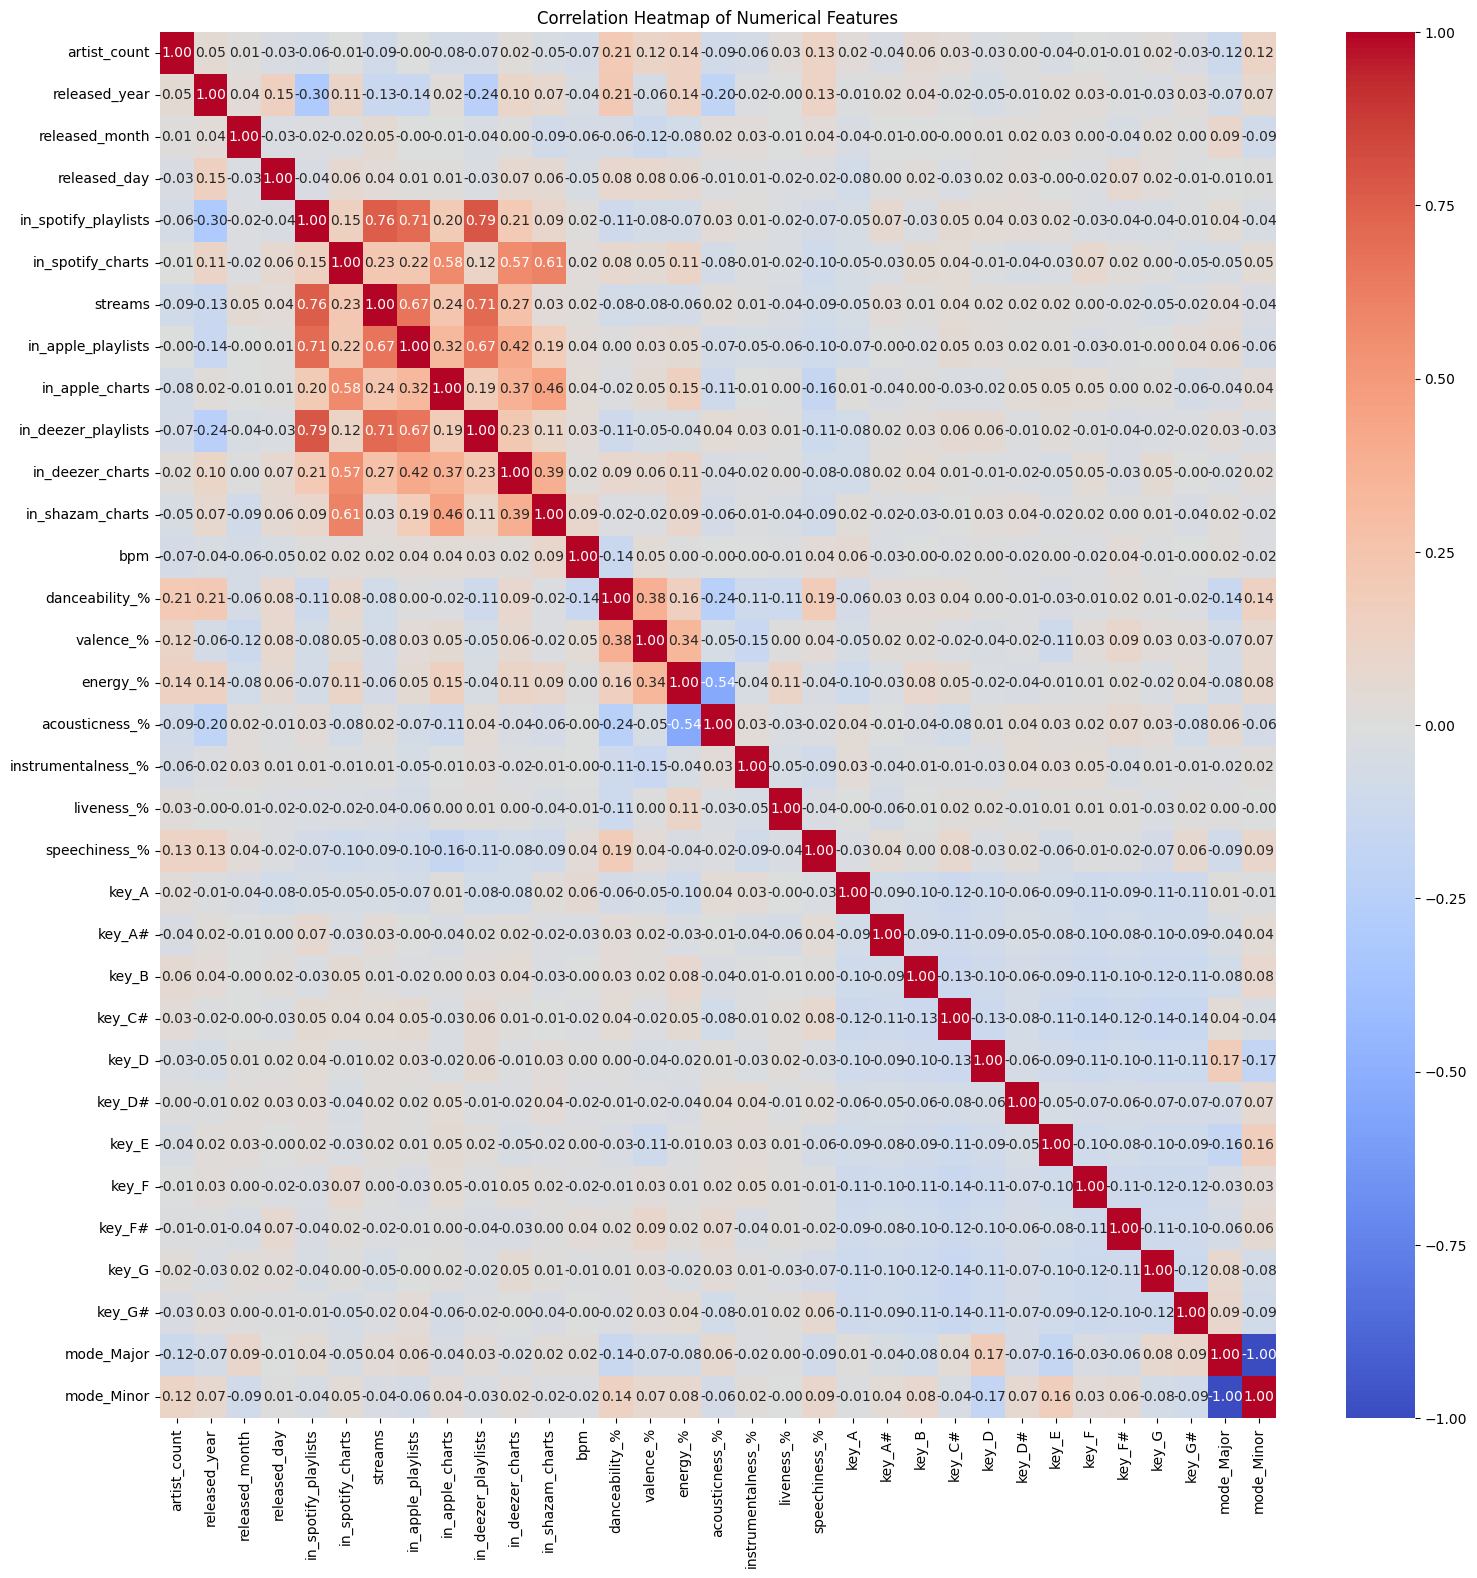

In [8]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(18,18)) 

# Computes and displayes the correlation between all numerical features 
corr_matrix = df_encoded.corr(numeric_only=True)
corr_matrix

# Creates and displays Heatmap of to show correlation
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", ax=ax)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()


In [26]:

TARGET = "streams"
x = df_encoded.drop(columns=[TARGET]).values
y = df_encoded[[TARGET]].values

print("X_train shape: {}".format(x.shape))
print("y_train shape: {}".format(y.shape))

# First, separate out 10% of the data as the test set
X_temp, X_test, y_temp, y_test = train_test_split(
    x, y,
    test_size= 0.10,
    random_state= 42  # preserves class proportions
)

# From the remaining 90%, take 20% as validation (which equals 18% of total data)
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp,
    test_size=(0.20 / 0.90),  # proportionally 20% of the original dataset
    random_state=42
)

# Display shapes to confirm
print("Split sizes:")
print(f"  Train set: {X_train.shape[0]} samples,  {X_train.shape[1]} features")
print(f"  Val set  : {X_val.shape[0]} samples,  {X_val.shape[1]} features")
print(f"  Test set : {X_test.shape[0]} samples,  {X_test.shape[1]} features")

# Optional: Verify class balance in each split
print("\nClass distribution (Train):")
display(y_train.value_counts(normalize=True).to_frame("Proportion"))

print("\nClass distribution (Validation):")
display(y_val.value_counts(normalize=True).to_frame("Proportion"))

print("\nClass distribution (Test):")
display(y_test.value_counts(normalize=True).to_frame("Proportion"))

X_train shape: (748, 32)
y_train shape: (748, 1)
Split sizes:
  Train set: 523 samples,  32 features
  Val set  : 150 samples,  32 features
  Test set : 75 samples,  32 features

Class distribution (Train):


<class 'AttributeError'>: 'numpy.ndarray' object has no attribute 'value_counts'

In [22]:
models = {
    "SVM (RBF)": SVC(kernel="rbf", probability=True, random_state=42)
}

pipelines = {
    name: Pipeline(steps=[
        ("scaler", StandardScaler()),
        ("model", mdl)
    ])
    for name, mdl in models.items()
}

train_times_ms = {}

for name, pipe in pipelines.items():
    start = time.perf_counter()
    pipe.fit(X_train, y_train)
    end = time.perf_counter()
    train_times_ms[name] = (end - start) * 1000  # convert seconds to ms

# Display training times
print("Training Times (milliseconds):")
for name, ms in train_times_ms.items():
    print(f"{name:>20}: {ms:,.2f} ms")     

# Keep trained models for later use in Q2
svm_rbf_clf = pipelines["SVM (RBF)"]



<class 'NameError'>: name 'X_train' is not defined